In [1]:
import matplotlib.pyplot as plt
from iso3166 import countries
import seaborn as sns
import pandas as pd
import numpy as np
import datetime
import folium
import math

### Опис датасету
Датасет містить дані по 18-місячній активності 46,339 користувачів онлайн сервісу для ставок bwin.
Дані включають особисту інформацію про користувача(країну, стать, рік народження, дату реєстрації), а також дані про всі його ставки на протязі періоду(щоденні та загальні значення кількості ставок, виграшу та суми поставлених грошей)

In [2]:
csv_filename1 = "data/PopTrendsBData1Fixed.csv"
df1 = pd.read_csv(csv_filename1)
csv_filename2 = "data/PopTrendsBData2Live.csv"
df2 = pd.read_csv(csv_filename2)
csv_filename3 = "data/PopTrendsBData3Aggs.csv"
df3 = pd.read_csv(csv_filename3)

In [3]:
# 1

def get_week_number(row):
    day = [int(x) for x in row["DateBet"].split('-')]
    week = str(datetime.date(day[0], day[1], day[2]).isocalendar()[1])
    if len(week) == 1:
        week = "0"+week
    return str(day[0])+ week
day_sum_df1 = df1.groupby(["DateBet"]).sum().reset_index()
day_sum_df1["WeekNumberStr"] = day_sum_df1.apply(get_week_number, axis=1)
week_number_df1 = day_sum_df1.groupby("WeekNumberStr").sum().reset_index().reset_index().rename(columns={'index': 'WeekNumber'})[:52]
week_number_df1["WeekDateFormat"] = pd.date_range("2005-02", freq="W", periods=52)

day_sum_df2 = df2.groupby(["DateBet"]).sum().reset_index()
day_sum_df2["WeekNumberStr"] = day_sum_df2.apply(get_week_number, axis=1)
week_number_df2 = day_sum_df2.groupby("WeekNumberStr").sum().reset_index().reset_index().rename(columns={'index': 'WeekNumber'})[:52]
week_number_df2["WeekDateFormat"] = pd.date_range("2005-02", freq="W", periods=52)

In [4]:
# 2

def get_week(row):
    day = [int(x) for x in row["DateBet"].split('-')]
    return datetime.datetime(day[0], day[1], day[2]).weekday()

day_df = df2.groupby(["DateBet"]).mean().reset_index()
day_df['WeekDay'] =  day_df.apply(get_week, axis = 1)
day_df["ReturnSum"] = day_df.apply(lambda row: row["WinL"]/row["StakeL"]*100, axis = 1)
day_df["WeekNumber"] = day_df.apply(get_week_number, axis=1)

In [5]:
# 3

df3_filtered = df3[df3["BirthYear"] > 1919]
df3_filtered = df3_filtered[df3_filtered["BetsA"] < 2000]
df3_filtered["Age"] = df3_filtered.apply(lambda row: 2008 - row["BirthYear"], axis=1)
birthyear_df = df3_filtered.groupby(["Age"]).mean().reset_index()

### 1. Сума ставок користувачів впродовж першого року користування

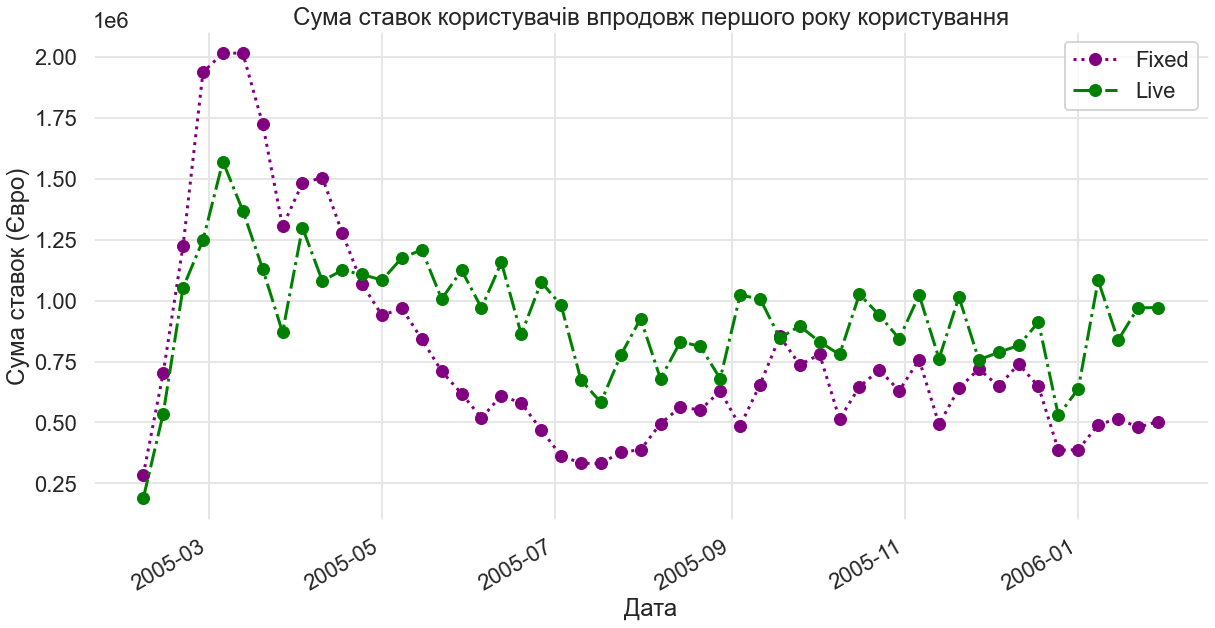

In [6]:
sns.set(rc={'figure.figsize':(20,10)}, font_scale=1.4)
sns.set_style({'axes.facecolor':'white', 'grid.color': '.9'})
sns.set_context("poster")

fig, ax = plt.subplots()

ax.plot_date(
    week_number_df1["WeekDateFormat"],
    week_number_df1["StakeF"],
    xdate=0,
    color="purple",
    label="Fixed",
    linestyle=":"
)
ax.plot_date(week_number_df2["WeekDateFormat"],
             week_number_df2["StakeL"],
             color="green",
             label="Live",
             linestyle="-."
)
ax.legend()
ax.set(
    xlabel="Дата",
    ylabel="Сума ставок (Євро)",
    title="Сума ставок користувачів впродовж першого року користування"
)
plt.gcf().autofmt_xdate()
plt.show()

### 2. Розподіл кількості ставок користувачів відповідно дня тижня

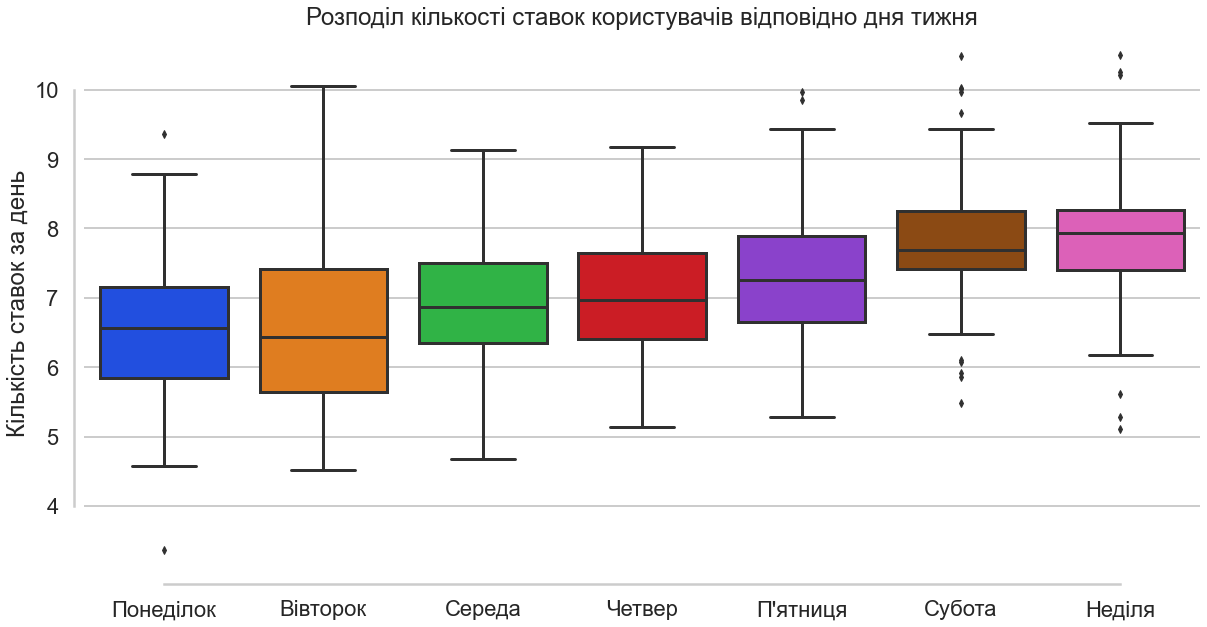

In [7]:
sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (20,10)
ax = sns.boxplot(
    x="WeekDay",
    y="BetsL",
    data=day_df,
    palette="bright"
)
sns.despine(offset=10, trim=True);
ax.set(
    xlabel=None,
    ylabel="Кількість ставок за день",
    xticklabels=["Понеділок", "Вівторок", "Середа", "Четвер", "П'ятниця", "Субота", "Неділя"],
    title="Розподіл кількості ставок користувачів відповідно дня тижня"
)
plt.show()

### 3. Букмекерська активність залежно від віку

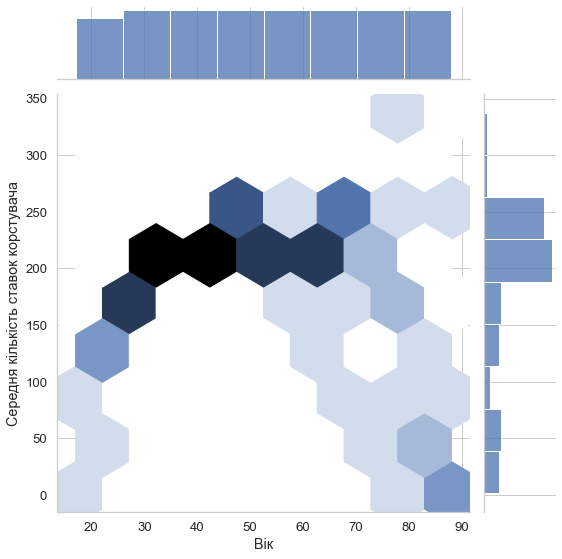

In [8]:
sns.set(font_scale=1.2)
sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (20,20)
ax = sns.jointplot(
    x='Age',
    y='BetsA',
    data=birthyear_df,
    kind="hex",
    height=8
)
ax.set_axis_labels('Вік', 'Середня кількість ставок корстувача')
plt.show()